In [26]:
# Imports standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: Prétraitement des données
from sklearn.preprocessing import StandardScaler

# Scikit-learn: Division des ensembles de données
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    learning_curve,
    GridSearchCV,
    StratifiedKFold
)

# Scikit-learn: Algorithmes de classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Autres bibliothèques de classification
from xgboost import XGBClassifier, plot_importance

# Scikit-learn: Évaluation des performances
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    ConfusionMatrixDisplay,
    roc_auc_score

)

# Outils auxiliaires
from itertools import product
from tabulate import tabulate

# Scikit-learn: Génération de données de classification
from sklearn.datasets import make_classification

from sklearn.pipeline import Pipeline



In [4]:
#importing the data
data = pd.read_csv('C:/Users/Abir/Desktop/PIM-Finale/trainTest.csv', encoding='latin-1')


# Compréhension de data

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
1,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
2,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
3,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
4,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       925 non-null    int64  
 1   sex       925 non-null    int64  
 2   cp        925 non-null    int64  
 3   trestbps  925 non-null    int64  
 4   chol      925 non-null    int64  
 5   fbs       925 non-null    int64  
 6   restecg   925 non-null    int64  
 7   thalach   925 non-null    int64  
 8   exang     925 non-null    int64  
 9   oldpeak   925 non-null    float64
 10  slope     925 non-null    int64  
 11  ca        925 non-null    int64  
 12  thal      925 non-null    int64  
 13  target    925 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,54.478919,0.698378,0.948108,131.364324,246.971892,0.145946,0.529730,149.058378,0.334054,1.047135,1.387027,0.753514,2.330811,0.517838
std,9.031261,0.459210,1.034842,17.669348,51.910130,0.353243,0.524747,23.165153,0.471914,1.136137,0.611439,1.029753,0.619639,0.499952
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
X = data.drop(columns=["target"])  # Caractéristiques (features)
Y = data["target"]                 # Colonne cible (label)
feature_names = X.columns          # Noms des colonnes

In [9]:
print(data['target'].unique())

[1 0]


In [10]:
data.shape

(925, 14)

# Diagramme des distributions (Histogrammes)

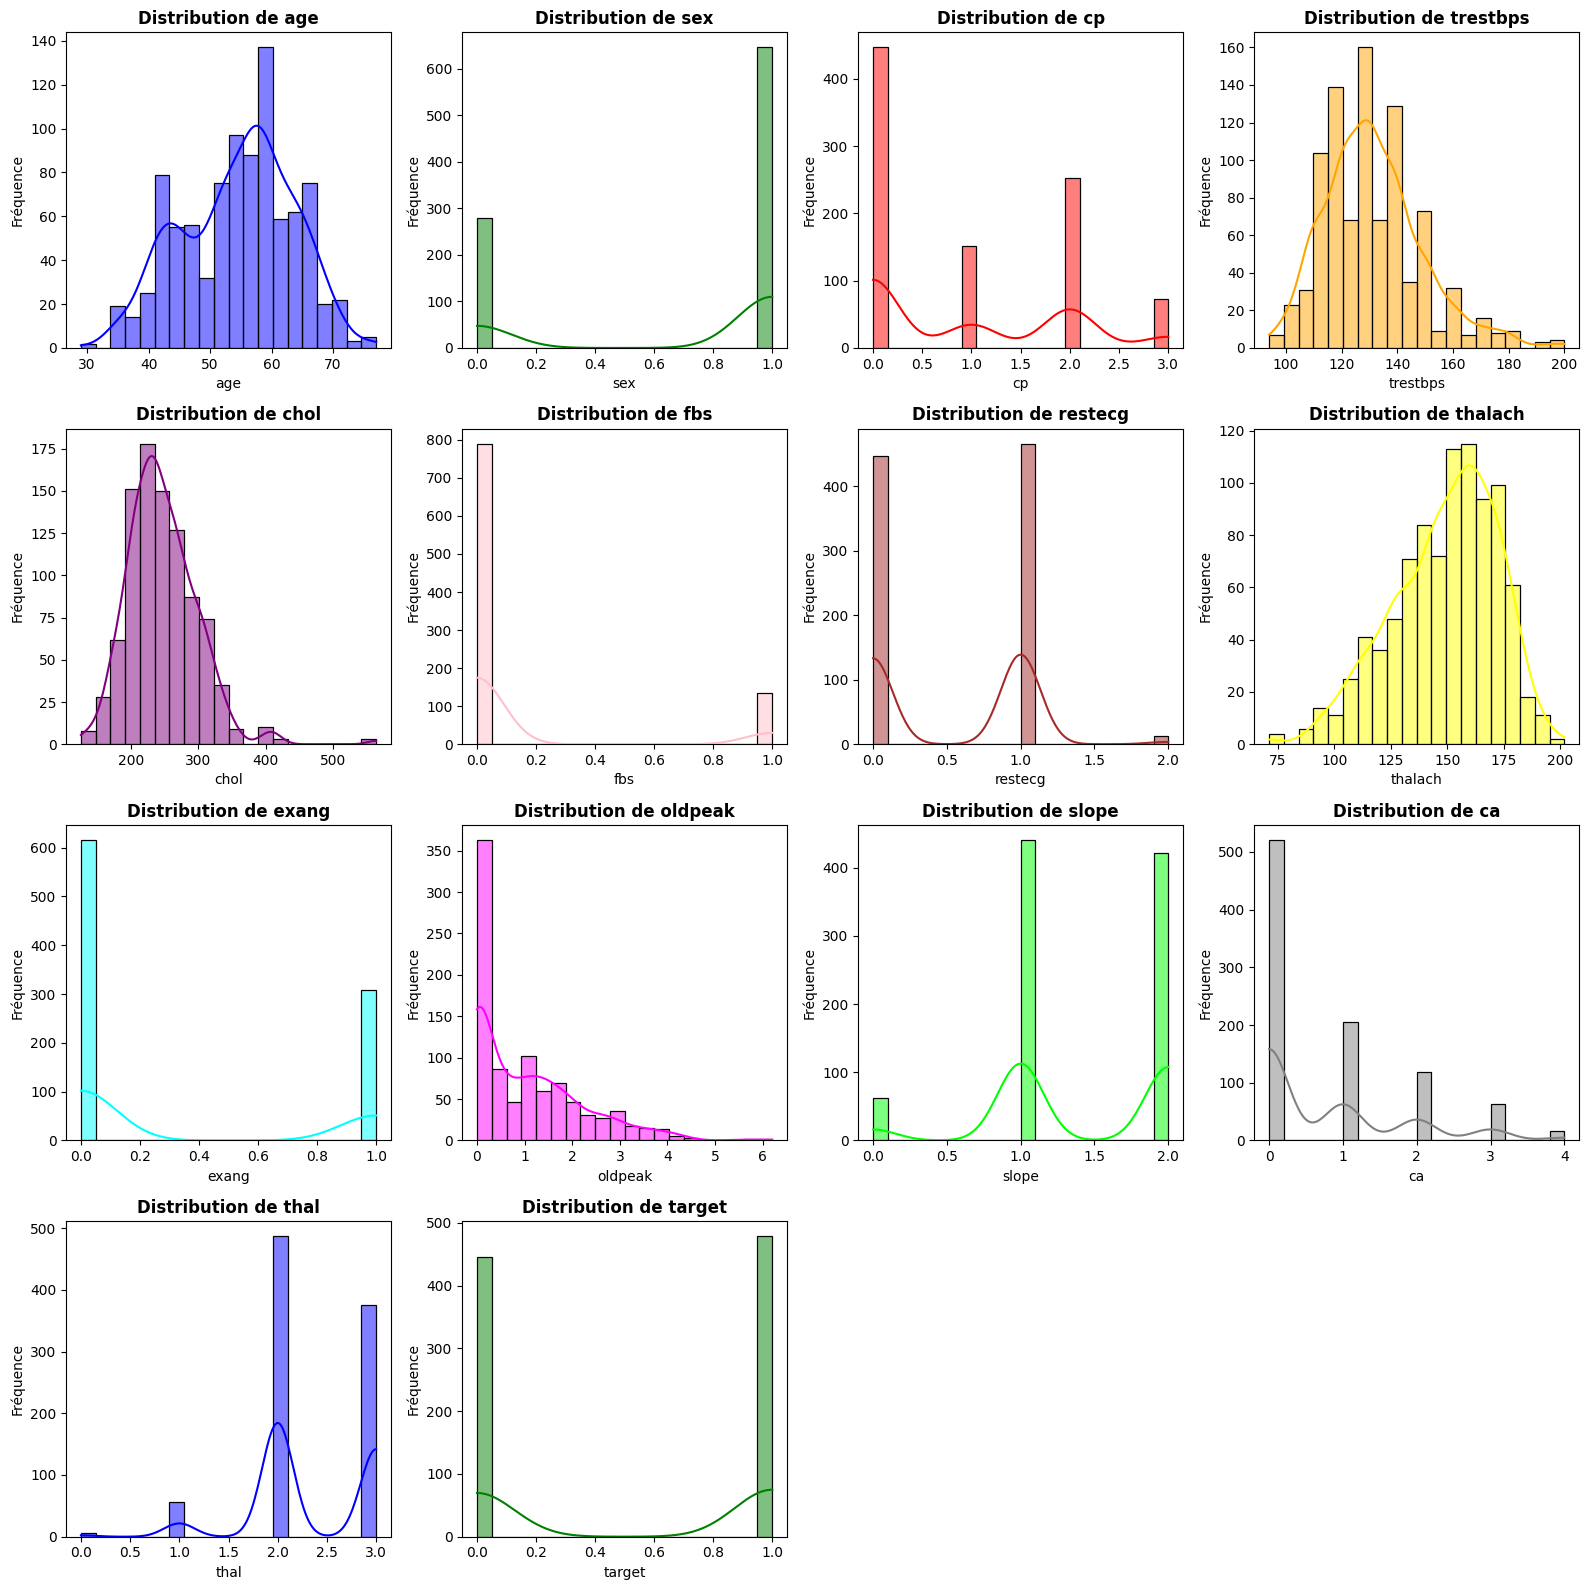

In [11]:
# Identifier les colonnes numériques
numeric_cols = data.select_dtypes(include=np.number).columns

# Déterminer le nombre de lignes et de colonnes pour la grille
n_cols = 4  # Nombre de colonnes par ligne
n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols != 0 else 0)

# Tracer les distributions des variables numériques
plt.figure(figsize=(16, 4 * n_rows))  # Taille de la figure
colors = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown', 'yellow', 'cyan', 'magenta', 'lime', 'gray']

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Placement dynamique des sous-graphiques
    sns.histplot(data[col], kde=True, color=colors[i % len(colors)], bins=20)
    plt.title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Fréquence', fontsize=10)

plt.tight_layout()  # Ajustement des espaces entre les graphiques
plt.show()

Répartition de la target

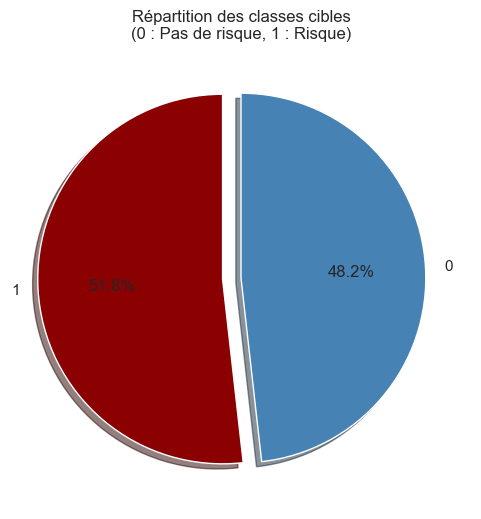


Décompte des valeurs de la target :
target
1    479
0    446
Name: count, dtype: int64


In [27]:
# Comptage des classes sur le jeu de données
class_counts = data['target'].value_counts()

# Tracer le graphique circulaire
plt.figure(figsize=(6, 6))
class_counts.plot.pie(
    autopct='%1.1f%%',               # Affiche les pourcentages avec 1 décimale
    colors=['#8B0000', '#4682B4'],   # Couleurs personnalisées
    startangle=90,                   # Début du tracé à 90°
    explode=(0.1, 0),                # Éloigne légèrement la première section
    shadow=True                      # Ajoute une ombre au graphique
)

# Ajouter un titre
plt.title("Répartition des classes cibles\n(0 : Pas de risque, 1 : Risque)", fontsize=12)

# Masquer le label de l'axe Y pour un meilleur rendu
plt.ylabel('')

# Afficher le graphique
plt.show()

# Afficher le décompte des valeurs de la target
print("\nDécompte des valeurs de la target :")
print(data['target'].value_counts())


# Matrice de corrélation

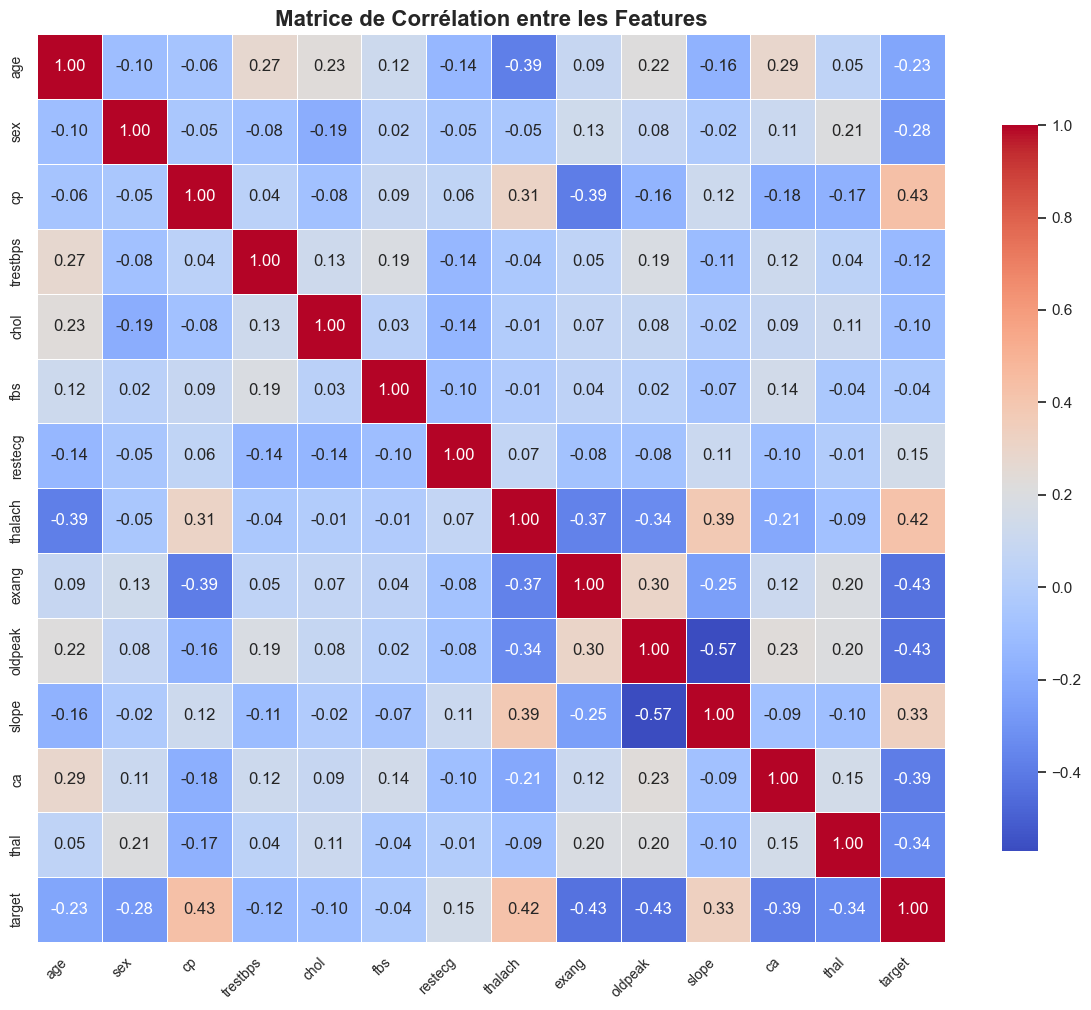

In [28]:
# Calculer la matrice de corrélation entre toutes les features
correlation_matrix = data.corr()

# Configurer la figure pour la heatmap
plt.figure(figsize=(12, 10))

# Visualiser la matrice de corrélation avec une heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,               # Affiche les valeurs dans chaque case
    fmt='.2f',                # Format des décimales
    cmap='coolwarm',          # Palette de couleurs
    linewidths=0.5,           # Taille des séparateurs
    square=True,              # Carrés pour une matrice symétrique
    cbar_kws={"shrink": 0.8}  # Réduit la taille de la barre de couleur
)

# Ajouter un titre pour la heatmap
plt.title('Matrice de Corrélation entre les Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation des étiquettes de colonnes
plt.yticks(fontsize=10)                          # Taille des étiquettes des lignes
plt.tight_layout()                               # Ajustement automatique pour éviter les chevauchements
plt.show()


# Corrélation entre chaque feature et la target:

C:\Users\Abir\AppData\Local\Temp\ipykernel_8088\1660751341.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Abir\AppData\Local\Temp\ipykernel_8088\1660751341.py:12: UserWarning: 
The palette list has fewer values (6) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


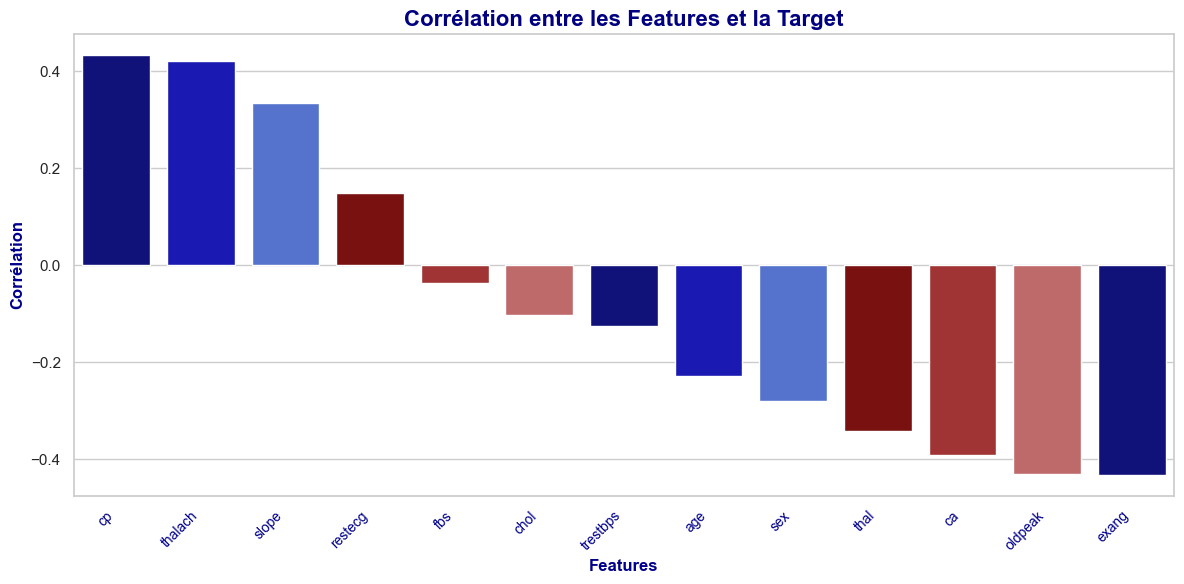

In [31]:
# Calculer la corrélation entre chaque feature et la target
correlation_matrix = data.corr()

# Afficher la corrélation entre les features et la target, triée par ordre décroissant
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)

# Visualisation avec un design
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Créer un barplot
sns.barplot(
    x=correlation_with_target.index[1:],  # Skip the target correlation
    y=correlation_with_target.values[1:],  # Skip the target correlation 
    palette=['darkblue', 'mediumblue', 'royalblue', 'darkred', 'firebrick', 'indianred'][:len(correlation_with_target)-1]  # Adjust palette length
)

# Ajouter un titre et personnaliser les axes
plt.title('Corrélation entre les Features et la Target', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Features', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Corrélation', fontsize=12, fontweight='bold', color='darkblue')

# Rotation des labels de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkblue')

# Afficher le graphique
plt.tight_layout()  # Ajuste l'affichage pour éviter le chevauchement des éléments
plt.show()


# Les modèles

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

--- Logistic Regression ---
Exactitude (Accuracy) : 0.8216
AUC : 0.9148
Rapport de classification :
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        89
           1       0.80      0.88      0.84        96

    accuracy                           0.82       185
   macro avg       0.82      0.82      0.82       185
weighted avg       0.82      0.82      0.82       185



--- SVM (RBF Kernel) ---
Exactitude (Accuracy) : 0.9405
AUC : 0.9767
Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        89
           1       0.92      0.97      0.94        96

    accuracy                           0.94       185
   macro avg       0.94      0.94      0.94       185
weighted avg       0.94      0.94      0.94       185



--- Decision Tree ---
Exactitude (Accuracy) : 0.8865
AUC : 0.9539
Rapport de classification :
              precision    recall  f1-score   suppo

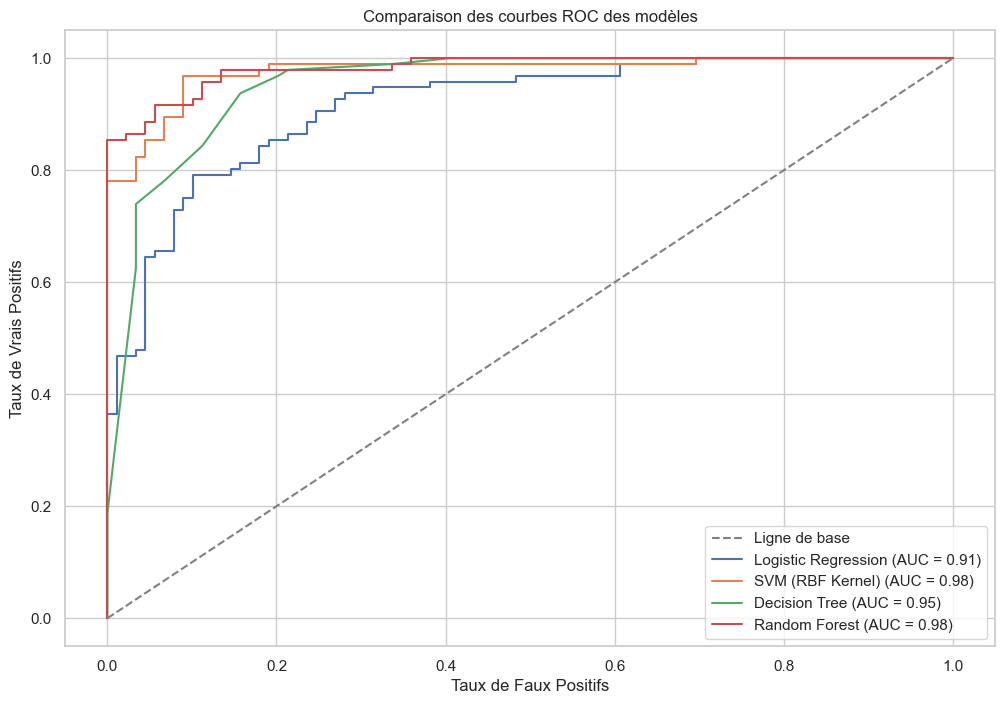

In [17]:

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèles à entraîner
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42,max_depth=5, min_samples_split=10),
}
# Initialisation de la figure pour afficher les courbes ROC
plt.figure(figsize=(12, 8))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Ligne de base")

# Entraînement des modèles et calcul des métriques
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Utilisation des données normalisées pour l'entraînement

    # Prédictions
    y_pred = model.predict(X_test_scaled)  # Prédictions sur les données normalisées de test
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour le calcul de l'AUC

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Affichage des résultats
    print(f"--- {model_name} ---")
    print(f"Exactitude (Accuracy) : {accuracy:.4f}")
    print(f"AUC : {roc_auc:.4f}")
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Affichage de la courbe ROC
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Configuration de la figure
plt.title("Comparaison des courbes ROC des modèles")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend(loc="lower right")
plt.show()


** Pourquoi j'ai choisi Random Forest : **

*   Robustesse et réduction du surapprentissage (overfitting)
*   Performance et précision :
*   Flexibilité avec le nombre de caractéristiques

**=> il offre un bon compromis entre robustesse, précision, et interprétabilité, tout en étant bien adapté à la nature des données cliniques utilisées pour prédire les risques de crises cardiaques.**





Matrice de confusion

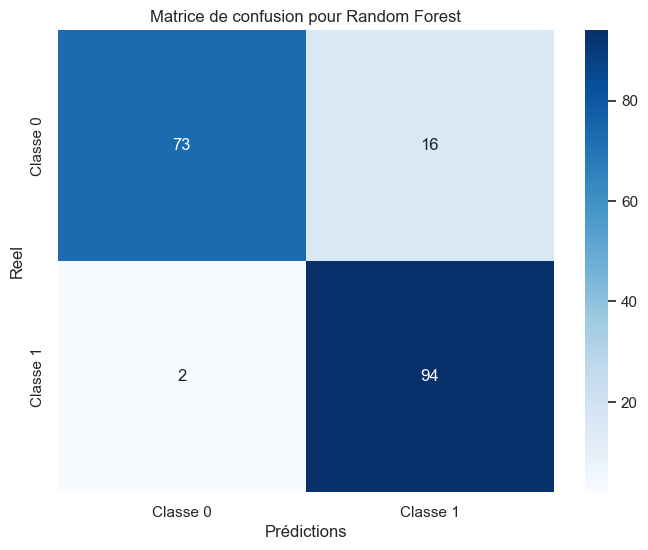

In [33]:
# Prédictions avec Random Forest
rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test_scaled)

# Création de la matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title("Matrice de confusion pour Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Reel")
plt.show()


# TUNING


Tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs paramètres pour Random Forest:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Meilleur score CV: 0.9930

Random Forest CV Score: 0.9944 (+/- 0.0120)


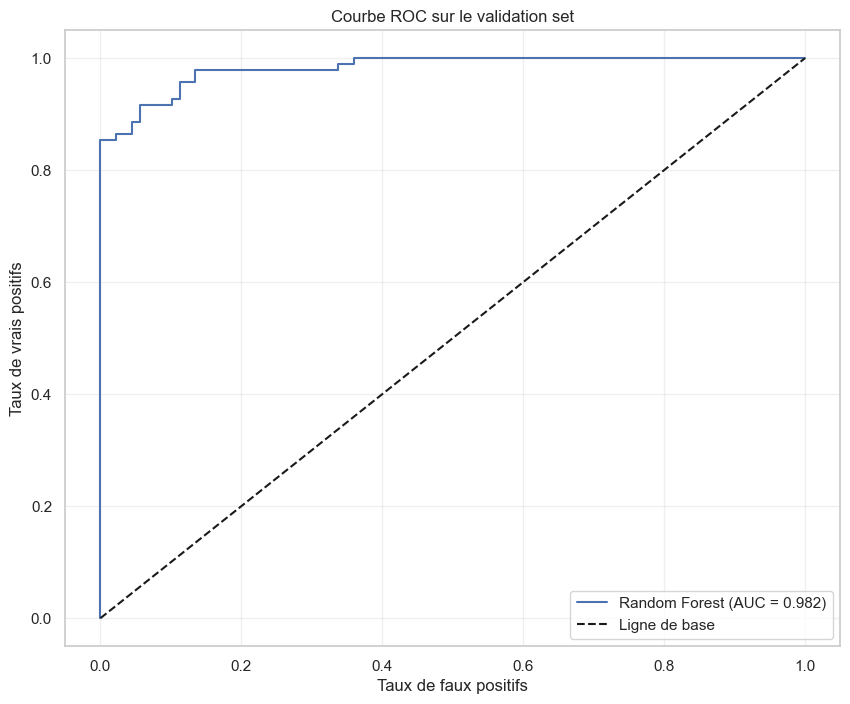

In [19]:
# 1. Définir les paramètres à optimiser pour Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [5, 10, 15]
}

# 2. Fonction pour effectuer la cross-validation et le tuning
def tune_model(model, param_grid, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X, y)
    return grid_search

# 3. Effectuer le tuning pour Random Forest
print("\nTuning Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
grid_search = tune_model(rf_model, param_grid, X_train_scaled, y_train)
best_rf = grid_search.best_estimator_
print(f"Meilleurs paramètres pour Random Forest:")
print(grid_search.best_params_)
print(f"Meilleur score CV: {grid_search.best_score_:.4f}")

# 4. Évaluer le modèle optimisé avec cross-validation
cv_scores = cross_val_score(
    best_rf,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='roc_auc'
)
print(f"\nRandom Forest CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


# 7. Visualiser la courbe ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Ligne de base')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC sur le validation set')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()



# évaluer le modèle sur les données de test

In [20]:
new_data = pd.read_csv("C:/Users/Abir/Desktop/PIM-Finale/validation.csv")
X_new = new_data.drop(columns=["target"])
y_new = new_data["target"]
X_new_scaled = scaler.transform(X_new)

--- Random Forest sur la nouvelle dataset ---
Exactitude (Accuracy) : 0.8900
AUC : 0.9868
Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.81      0.89        53
           1       0.82      0.98      0.89        47

    accuracy                           0.89       100
   macro avg       0.90      0.90      0.89       100
weighted avg       0.90      0.89      0.89       100



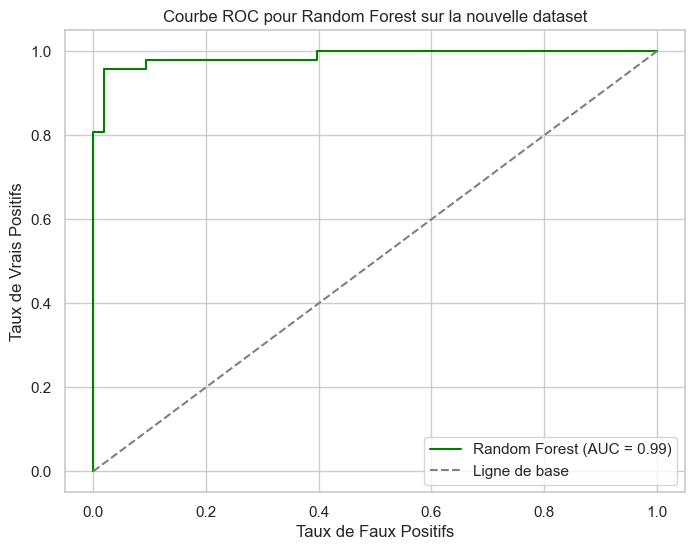

In [21]:
# Charger le modèle Random Forest
rf_model = models["Random Forest"]

# Prédire les classes et les probabilités
y_new_pred = rf_model.predict(X_new_scaled)
y_new_proba = rf_model.predict_proba(X_new_scaled)[:, 1]

# Calculer l'exactitude et les métriques ROC
accuracy = accuracy_score(y_new, y_new_pred)
fpr, tpr, _ = roc_curve(y_new, y_new_proba)
roc_auc = auc(fpr, tpr)

# Afficher les résultats
print(f"--- Random Forest sur la nouvelle dataset ---")
print(f"Exactitude (Accuracy) : {accuracy:.4f}")
print(f"AUC : {roc_auc:.4f}")
print("Rapport de classification :")
print(classification_report(y_new, y_new_pred))

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Ligne de base")
plt.title("Courbe ROC pour Random Forest sur la nouvelle dataset")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend(loc="lower right")
plt.show()


# Tuning


Tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs paramètres pour Random Forest:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Meilleur score CV: 0.9930

Random Forest CV Score: 0.9944 (+/- 0.0120)


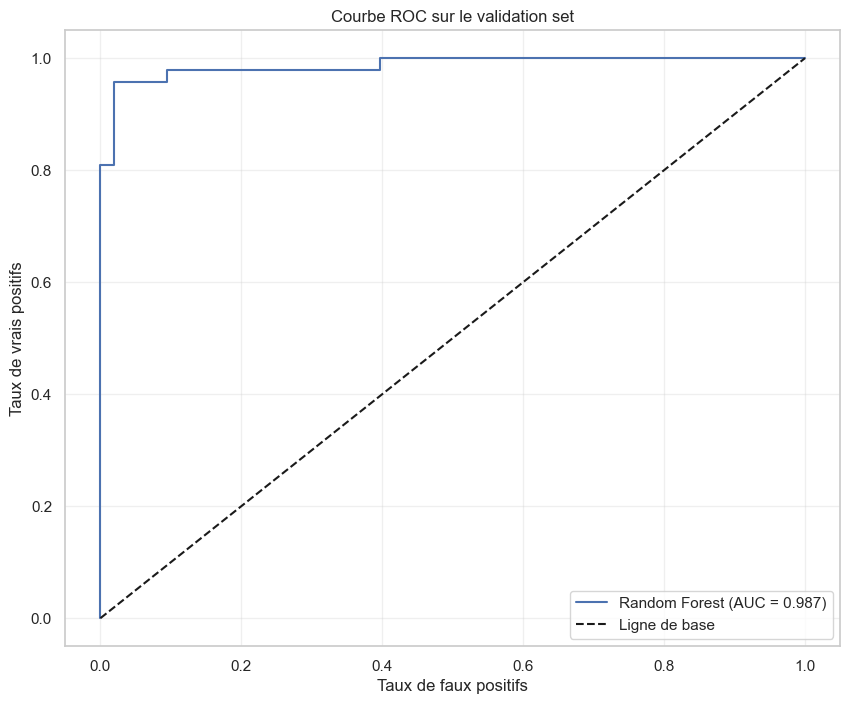

In [22]:
# 1. Définir les paramètres à optimiser pour Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [5, 10, 15]
}

# 2. Fonction pour effectuer la cross-validation et le tuning
def tune_model(model, param_grid, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X, y)
    return grid_search

# 3. Effectuer le tuning pour Random Forest
print("\nTuning Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
grid_search = tune_model(rf_model, param_grid, X_train_scaled, y_train)
best_rf = grid_search.best_estimator_
print(f"Meilleurs paramètres pour Random Forest:")
print(grid_search.best_params_)
print(f"Meilleur score CV: {grid_search.best_score_:.4f}")

# 4. Évaluer le modèle optimisé avec cross-validation
cv_scores = cross_val_score(
    best_rf,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='roc_auc'
)
print(f"\nRandom Forest CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


# 7. Visualiser la courbe ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Ligne de base')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC sur le validation set')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()



# Analyser l'importance des caractéristiques

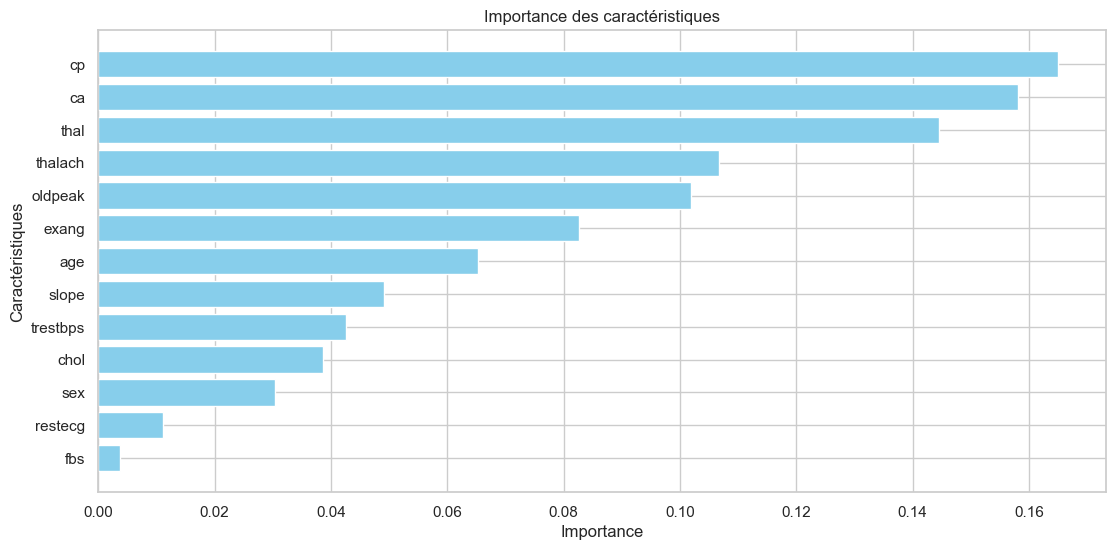

Importance des caractéristiques :
cp: 0.16494233245190504
ca: 0.15808438954731516
thal: 0.14459492031617863
thalach: 0.10675460017817753
oldpeak: 0.10184343080475589
exang: 0.0827143147657176
age: 0.065215327178833
slope: 0.04917126342740318
trestbps: 0.0425593425308091
chol: 0.03870871078148813
sex: 0.0304368976018033
restecg: 0.011208291610143313
fbs: 0.003766178805470208


In [34]:
# Assurez-vous que le modèle Random Forest est entraîné
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=5, min_samples_split=10)

# Entraînez le modèle ici
rf_model.fit(X_train_scaled, y_train)

# Obtenir l'importance des caractéristiques
feature_importance = rf_model.feature_importances_

# Convertir en DataFrame pour correspondre aux noms de colonnes
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Tracer l'importance des caractéristiques avec noms réels
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(13, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Importance des caractéristiques")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.gca().invert_yaxis()
plt.show()

# Afficher l'importance des caractéristiques avec les noms
print("Importance des caractéristiques :")
for feature, importance in zip(importance_df['Feature'], importance_df['Importance']):
    print(f"{feature}: {importance}")



Préparation de l'environnement pour l'application streamlit 

In [24]:
!mkdir heart_disease_web
!cd heart_disease_web

Un sous-r�pertoire ou un fichier heart_disease_web existe d�j�.


In [25]:
# Create directory structure
import os

# Create main directory if it doesn't exist
os.makedirs('heart_disease_web', exist_ok=True)

# Create subdirectories
os.makedirs('heart_disease_web/data', exist_ok=True)
os.makedirs('heart_disease_web/src', exist_ok=True)

# Create empty files
open('heart_disease_web/src/__init__.py', 'a').close()
open('heart_disease_web/src/data_processing.py', 'a').close() 
open('heart_disease_web/src/visualization.py', 'a').close()
open('heart_disease_web/src/modeling.py', 'a').close()
open('heart_disease_web/app.py', 'a').close()
open('heart_disease_web/requirements.txt', 'a').close()

print("Project structure created successfully!")


Project structure created successfully!
